# Notebook to reproduce Figure 4

## Import

In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from functions_IDEAS import compute_ID

## Functions

In [3]:
def normalize_plot_spec(y, y_err, max_val, min_val):
    range_rescaling = max_val-min_val
    y_norm = [(d-min_val)/range_rescaling for d in y]
    y_err_norm = [std/range_rescaling for std in y_err]

    return y_norm, y_err_norm

# Figure 4

Import and visualize data with UMAP projection

In [3]:
adata = sc.read('/Users/maddalenastaiano/Desktop/data/Nair.h5ad')
#adata.obs.to_csv("../Metadata/Metadata_fig4.csv")

/Users/maddalenastaiano/opt/anaconda3/envs/pancreas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


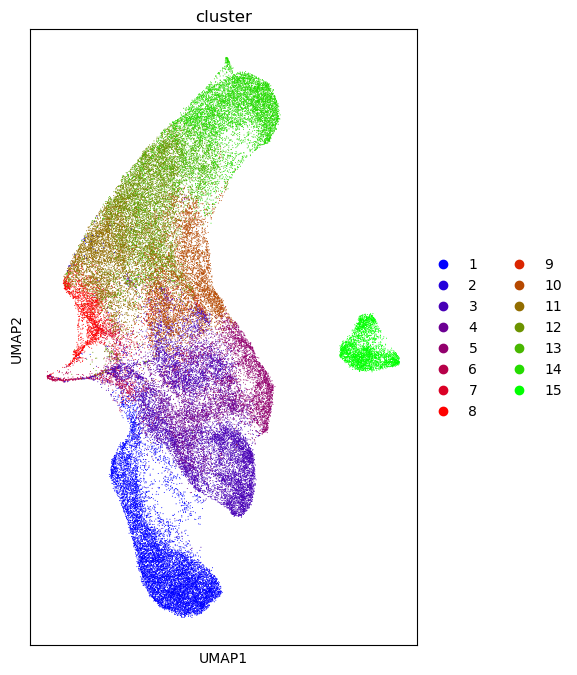

In [7]:
#UMAP
fig, ax = plt.subplots(figsize=(5, 8))  

sc.pl.umap(adata, color=['cluster'],  palette = 'brg', ax=ax)

ax.set_title('UMAP Projection Colored by Cluster', fontsize=16)
ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)

plt.show()

Check cell counts per cluster and remove small clusters

In [8]:
np.unique(adata.obs.cluster, return_counts = True)

(array(['1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6',
        '7', '8', '9'], dtype=object),
 array([11041,  4445,  4468,  7217,  1863,  6553,  3125,   140, 10306,
         3287,  3183,   934,   523,  1707,   586]))

In [9]:
cluster, counts = np.unique(adata.obs.cluster, return_counts = True)
min_index = np.argmin(counts)
min_cluster = cluster[min_index]
min_count = counts[min_index]
print(f"Cluster with minimum number of counts counts: {min_cluster}")
print(f"Minimum counts: {min_count}")

Cluster with minimum number of counts counts: 2
Minimum counts: 140


In [10]:
# Remove smallest cluster
adata = adata[adata.obs.cluster != '2']
cluster, counts = np.unique(adata.obs.cluster, return_counts = True)
min_index = np.argmin(counts)
min_cluster = cluster[min_index]
min_count = counts[min_index]
print(f"Cluster with minimum number of counts counts: {min_cluster}")
print(f"Minimum counts: {min_count}")

Cluster with minimum number of counts counts: 7
Minimum counts: 523


Group and divide data for different developmental trajectories : fibroblast, partial reprogramming, reprogramming

In [11]:
# groups of clusters
fibroblast_like = ['1', '3', '4', '5']
keratinocyte_like = ['6']
partial_reprogramming = ['7', '9', '10']
reprogramming = ['8', '11', '12', '13', '14', '15']

adata_fibro = adata[adata.obs.cluster.isin(fibroblast_like)]
adata_ker = adata[adata.obs.cluster.isin(keratinocyte_like)]
adata_part =  adata[adata.obs.cluster.isin(partial_reprogramming)]
adata_rep = adata[adata.obs.cluster.isin(reprogramming)]

Compute ID for each trajectory

In [12]:
id_fibro = compute_ID(adata_fibro, group = 'cluster', method='2nn', sample_size = 418, n_samples = 50, full_output = True)

Computing Intrinsic Dimension:   0%|          | 0/4 [00:00<?, ?it/s]

Computing ID for cluster 1:


Computing Intrinsic Dimension:  25%|██▌       | 1/4 [00:11<00:33, 11.18s/it]

Computing ID for cluster 3:


Computing Intrinsic Dimension:  50%|█████     | 2/4 [00:22<00:22, 11.17s/it]

Computing ID for cluster 4:


Computing Intrinsic Dimension:  75%|███████▌  | 3/4 [00:32<00:10, 10.83s/it]

Computing ID for cluster 5:


Computing Intrinsic Dimension: 100%|██████████| 4/4 [00:44<00:00, 11.08s/it]


In [23]:
id_part = compute_ID(adata_part, group = 'cluster', method='2nn', sample_size = 418, n_samples = 50, full_output = True)

#save for later (to compare with cluster 6 keratinocyte-like)
mean_cluster_7 = id_part['7'].mean()
std_cluster_7 = id_part['7'].std()

Computing Intrinsic Dimension:   0%|          | 0/3 [00:00<?, ?it/s]

Computing ID for cluster 10:


Computing Intrinsic Dimension:  33%|███▎      | 1/3 [00:10<00:21, 10.74s/it]

Computing ID for cluster 7:


Computing Intrinsic Dimension:  67%|██████▋   | 2/3 [00:20<00:10, 10.16s/it]

Computing ID for cluster 9:


Computing Intrinsic Dimension: 100%|██████████| 3/3 [00:30<00:00, 10.16s/it]


In [14]:
id_rep = compute_ID(adata_rep, group = 'cluster', method='2nn', sample_size = 418, n_samples = 50, full_output = True)

Computing Intrinsic Dimension:   0%|          | 0/6 [00:00<?, ?it/s]

Computing ID for cluster 11:


Computing Intrinsic Dimension:  17%|█▋        | 1/6 [00:11<00:56, 11.35s/it]

Computing ID for cluster 12:


Computing Intrinsic Dimension:  33%|███▎      | 2/6 [00:21<00:42, 10.57s/it]

Computing ID for cluster 13:


Computing Intrinsic Dimension:  50%|█████     | 3/6 [00:31<00:30, 10.28s/it]

Computing ID for cluster 14:


Computing Intrinsic Dimension:  67%|██████▋   | 4/6 [00:41<00:20, 10.38s/it]

Computing ID for cluster 15:


Computing Intrinsic Dimension:  83%|████████▎ | 5/6 [00:51<00:10, 10.29s/it]

Computing ID for cluster 8:


Computing Intrinsic Dimension: 100%|██████████| 6/6 [01:02<00:00, 10.40s/it]


Normalize values in the [0,1] range

In [16]:
values_fibro = id_fibro.values.flatten()
values_part = id_part.values.flatten()
values_rep = id_rep.values.flatten()
all_values = np.concatenate([values_fibro,values_part,values_rep])

min_val = np.min(all_values)
max_val = np.max(all_values)
range_vals = max_val - min_val


id_fibro = (id_fibro - min_val)/range_vals
id_part = (id_part - min_val)/range_vals
id_rep = (id_rep - min_val)/range_vals

id_part = id_part[sorted(id_part.columns, key=lambda x: int(x))]
id_rep = id_rep[sorted(id_rep.columns, key=lambda x: int(x))]

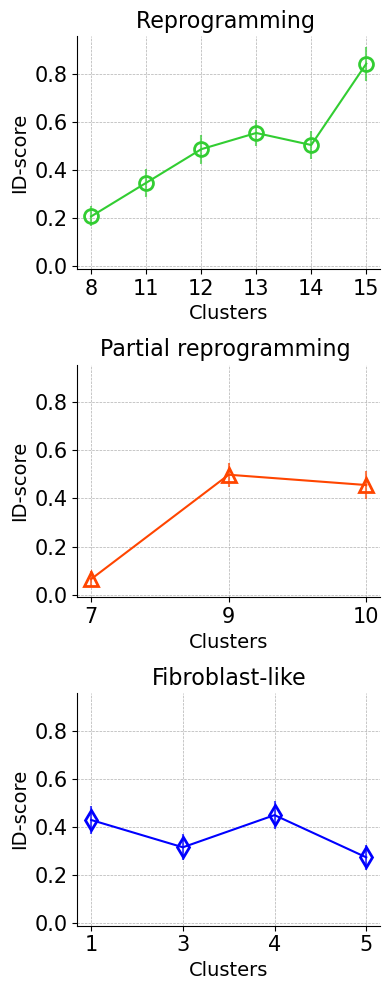

In [18]:
# Plot 
fig, ax = plt.subplots(3, 1, figsize=(4, 10), sharey = True)

# Extract means and stds:
means_fibro = np.mean(id_fibro, axis = 0)
std_fibro = np.std(id_fibro, axis = 0)
means_part = np.mean(id_part, axis = 0)
std_part = np.std(id_part, axis = 0)
means_rep = np.mean(id_rep, axis = 0)
std_rep = np.std(id_rep, axis = 0)


#3 plots
ax[2].plot(fibroblast_like, means_fibro, marker='d', markersize=10, markerfacecolor='none', markeredgewidth=2, color='b')
ax[2].errorbar(fibroblast_like, means_fibro, yerr=std_fibro, fmt=' ', alpha=0.7, color='b')
ax[2].set_title('Fibroblast-like', fontsize=16)

ax[1].plot(partial_reprogramming, means_part, marker='^', markersize=10, markerfacecolor='none', markeredgewidth=2, color='orangered')
ax[1].errorbar(partial_reprogramming, means_part, yerr=std_part, fmt=' ', alpha=0.7, color='orangered')
ax[1].set_title('Partial reprogramming ', fontsize=16)

ax[0].plot(reprogramming, means_rep, marker='o', markersize=10, markerfacecolor='none', markeredgewidth=2, color='limegreen')
ax[0].errorbar(reprogramming, means_rep, yerr=std_rep, fmt=' ', alpha=0.7, color='limegreen')
ax[0].set_title('Reprogramming ', fontsize=16)

for i in range(3):
    ax[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    ax[i].set_xlabel('Clusters', fontsize=14)
    ax[i].set_ylabel('ID-score', fontsize=14)
    ax[i].tick_params(axis='both', which='major', labelsize=15)

sns.despine()
plt.tight_layout()

plt.show()


### Keratinocyte-like cluster (i.e. cluster 6) is the one with the lowest ID

Calculate ID for the keratinocyte-like cluster (cluster 6) and compare it to the cluster with lowest ID among previous trajectories (i.e. cluster 7)

In [28]:
id_ker = compute_ID(adata_ker, group = 'cluster', method='2nn', sample_size = 418, n_samples = 50)

mean_cluster_6 = id_ker['6'].mean()
std_cluster_6 = id_ker['6'].std()

Computing Intrinsic Dimension:   0%|          | 0/1 [00:00<?, ?it/s]

Computing ID for cluster 6:


Computing Intrinsic Dimension: 100%|██████████| 1/1 [00:10<00:00, 10.19s/it]


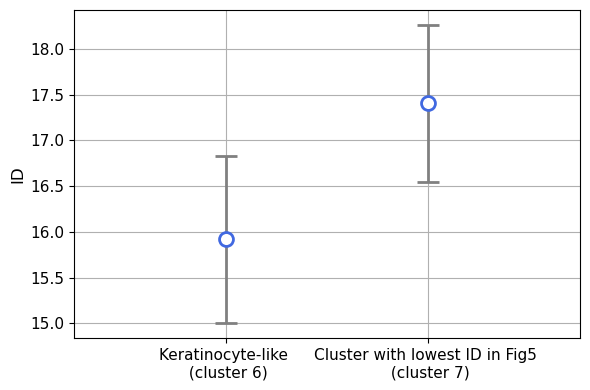

In [27]:
means = [mean_cluster_6,mean_cluster_7]
stds = [std_cluster_6,std_cluster_7]
labels = ['Keratinocyte-like \n (cluster 6)', 'Cluster with lowest ID in Fig5 \n (cluster 7)']

plt.figure(figsize=(6, 4))
x_pos = [0.3,0.7]
plt.errorbar(x_pos, means, yerr=stds, fmt='o', capsize=8,
             color='royalblue', ecolor='gray', elinewidth=2, markersize=10, markerfacecolor='white', markeredgewidth=2)
plt.xticks(x_pos, labels, fontsize=11)
plt.xlim([0,1])
plt.ylabel('ID', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True)

plt.tight_layout()
plt.show()